<a href="https://colab.research.google.com/github/kolithawarnakulasooriya/PyTorch-Learning/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Create the model class

In [ ]:
class Model(nn.Module):
  """
    Input layer (4 neurones)
    HL 1 ->
    HL 2 ->
    output layer (3 classes)
  """
  def __init__(self, in_features=4, h1=8, h2=10, out_classes=3):
    super().__init__()
    self.fully_connected_1 = nn.Linear(in_features, h1)
    self.fully_connected_2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_classes)

  def forward_propegate(self, x):
    x = F.relu(self.fully_connected_1(x))
    x = F.relu(self.fully_connected_2(x))
    x = self.out(x)
    return x




Train

In [ ]:
r = torch.random.manual_seed(41)
model = Model()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df['variety'] = df['variety'].replace('Setosa', 0)
df['variety'] = df['variety'].replace('Virginica', 1)
df['variety'] = df['variety'].replace('Versicolor', 2)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [ ]:
x = df.drop('variety', axis=1)
y = df['variety']

x, y

(     sepal.length  sepal.width  petal.length  petal.width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    1
 146    1
 147    1
 148    1
 149    1
 Name: variety, Length: 150, dtype: int64)

In [ ]:
x = x.values
y = y.values

x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

X_train, X_test, y_train, y_test

(tensor([[5.7000, 2.6000, 3.5000, 1.0000],
         [6.5000, 2.8000, 4.6000, 1.5000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [6.7000, 3.0000, 5.2000, 2.3000],
         [5.8000, 4.0000, 1.2000, 0.2000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5.9000, 3.2000, 4.8000, 1.8000],
         [6.2000, 2.9000, 4.3000, 1.3000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [5.2000, 4.1000, 1.5000, 0.1000],
         [6.5000, 3.0000, 5.8000, 2.2000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [5.7000, 3.8000, 1.7000, 0.3000],
         [6.7000, 2.5000, 5.8000, 1.8000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [6.2000, 2.2000, 4.5000, 1.5000],
         [6.4000, 2.7000, 5.3000, 1.9000],
         [5.8000, 2.7000, 3.9000, 1.2000],
         [7.4000, 2.8000, 6.1000, 1.9000],
         [5

In [ ]:

critarian = nn.CrossEntropyLoss()

# learning rate

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)



1. Learning rate is the reagengement if the error doesn't go down after some epochs

2. Critarin is the model of error measurement



## Training

In [ ]:
epochs = 200
losses = []

for i in range(epochs):
  ## get predicted results when train by forward propegation
  y_pred  = model.forward_propegate(X_train)

  # Measure the loss
  loss = critarian(y_pred, y_train)
  losses.append(loss.detach().numpy())

  # print in every 10 epochs
  if i % 10 == 0 :
    print(f'Epoch ({i}): {loss}')

  ## fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch (0): 1.0977412462234497
Epoch (10): 0.9113883376121521
Epoch (20): 0.631299614906311
Epoch (30): 0.40388479828834534
Epoch (40): 0.2787356674671173
Epoch (50): 0.1832587569952011
Epoch (60): 0.11597801744937897
Epoch (70): 0.07851293683052063
Epoch (80): 0.058872390538454056
Epoch (90): 0.04796312376856804
Epoch (100): 0.04126232862472534
Epoch (110): 0.036747053265571594
Epoch (120): 0.033458709716796875
Epoch (130): 0.030919132754206657
Epoch (140): 0.02887028455734253
Epoch (150): 0.027165208011865616
Epoch (160): 0.025712357833981514
Epoch (170): 0.024451004341244698
Epoch (180): 0.02333911694586277
Epoch (190): 0.022345274686813354


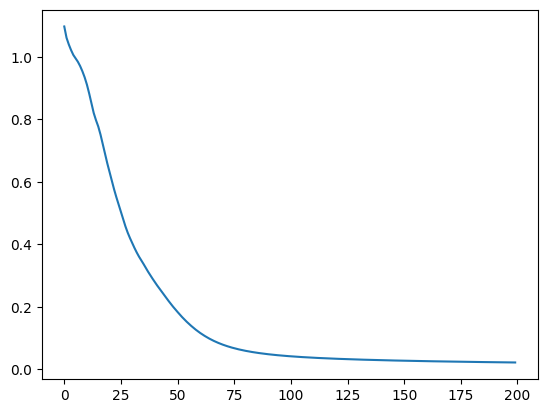

In [ ]:
plt.plot(range(epochs), losses)